In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


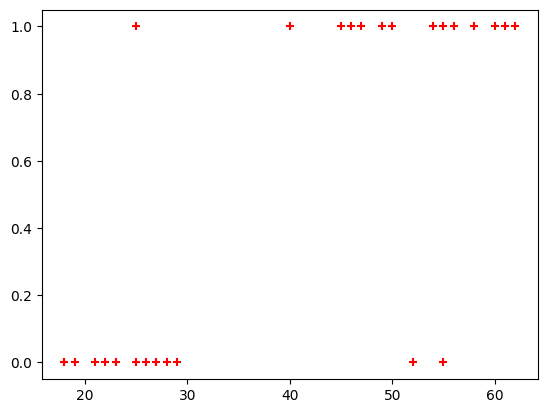

In [12]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [15]:
X_test

,age
21,26
5,56
19,18


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
X_test

,age
9,61
12,27
1,25


In [18]:
y_predicted = model.predict(X_test)

In [19]:
model.predict_proba(X_test)

array([[0.0536797 , 0.9463203 ],
       [0.79943258, 0.20056742],
       [0.83656473, 0.16343527]])

In [20]:
model.score(X_test,y_test)

1.0

In [21]:
y_predicted

array([1, 0, 0])

In [22]:
X_test

,age
9,61
12,27
1,25


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model